<h1 style="background-color: rgba(200, 200, 220, 0.3);">Concentrations of pollutants in the air<h1/>

#### Goals
The purpose of this workbook is to explore the **'4 - Concentrations'** data group from the London Atmospheric Emissions Inventory 2013 for machine learning model training. 

#### Notebook structure
- **First part** analyses, cleans, explores, and integrates the data source.    
- **Second part** further explores integrated data with unsupervised ML K-Means clustering.    

#### Source Data

The source data was downloaded from the following link: https://data.london.gov.uk/dataset/london-atmospheric-emissions-inventory-2013


The **"4 - Concentrations"**  data group contains concentrations of NOx, NO2, PM10, and PM2.5 at 20m grid level.     
Concentration of each pollutant substance is measured in micrograms, that is present within each cubic meter of air (µg/m³).

#### The data features

 - **NOx** Nitrogen oxides (according to LAEI 2013 documentation it is a key pollutant) is a group of highly reactive gases that contain nitrogen and oxygen atoms. The two most common nitrogen oxides are nitrogen oxide (NO) and nitrogen dioxide (NO2). NOx is considered a key pollutant because it can contribute to the formation of ozone and particulate matter, which are harmful to human health and the environment. NOx is also a contributor to acid rain and can damage crops and ecosystems.    

 - **NO2** is a specific type of NOx that is particularly important in air quality measurement because it can cause respiratory problems and is a precursor to the formation of ground-level ozone. It is often used as an indicator of traffic-related air pollution, as it is emitted by vehicles and other combustion sources.
 
 While NOx and NO2 are related, they are not the same. NOx is a broader term that encompasses both NO and NO2, as well as other nitrogen oxides. However, in terms of air quality, NO2 is generally considered to be the more significant pollutant, as it has a greater impact on human health and the environment. Thus, reducing NOx emissions is an important strategy for improving air quality and protecting human health and the environment, with a particular focus on reducing NO2 emissions from vehicles and other sources of combustion.

 
 - **PM10**  is a key pollutant that refers to inhalable coarse particles that have a diameter of 10 micrometers or less (aerodynamic diameter < 10 μm).These particles can come from a variety of sources, including dust, construction sites, and vehicle exhaust.      

 - **PM2.5** is a key pollutant that refers to fine inhalable particles with a diameter of 2.5 micrometers or less. hese particles are generally produced by combustion processes, such as burning coal or diesel fuel.
       
 Both *PM10* and *PM2.5* are considered air pollutants that have some common sources such as combustion of fossil fuels, industrial processes, and transportation. However, PM2.5 has additional sources such as wood-burning stoves and forest fires. PM10 can also come from natural sources such as dust storms and sea salt spray. 
 
 **PM2.5** is smaller and **more harmful** than PM10 as it can penetrate deeper into the lungs and even enter the bloodstream.    
 

 - **PM10d** refers to the number of days in a year when the daily mean concentration of PM10 exceeds 50 µg m−3. It is a measure of the frequency of high concentrations of PM10 in the air. PM10d description is based on the following resource:
https://iopscience.iop.org/article/10.1088/1742-6596/1834/1/012004/pdf     

 - The **x**, **y** variables refer to the x,y coordinate of the centre of each 20m grid cell covering Greater London.    
  **Please note** that x, y variables values do not represent longitude and latitude directly. The x and y values are *projected coordinates* of a point in the British National Grid reference system.     

<h3 style="background-color: rgba(200, 200, 220, 0.3);">Analysing, cleaning, and integrating "Pollutant Concentration" data<h3/>

Performing pollutant concentration data analysis, cleaning, and integration is crucial for ensuring the quality and reliability of the data used for ML training, which leads to better model performance and more accurate predictions. 

If the data used for training is inaccurate, incomplete, or inconsistent, it can lead to biased model and unreliable predictions. 

In [241]:
# Import necessary libraries
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import pyplot as plt
%matplotlib inline

##### **Load the dataset**

In [242]:
# 1. Load CSV files 

file_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/finalmod-barbara/code/Users/sgbsurow/csv_prepped/concentrations_per_grid/2013_NO2.csv"
df_NO2 = pd.read_csv(file_path)

file_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/finalmod-barbara/code/Users/sgbsurow/csv_prepped/concentrations_per_grid/2013_NOx.csv"
df_NOx = pd.read_csv(file_path)

file_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/finalmod-barbara/code/Users/sgbsurow/csv_prepped/concentrations_per_grid/2013_PM10.csv"
df_PM10 = pd.read_csv(file_path)

file_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/finalmod-barbara/code/Users/sgbsurow/csv_prepped/concentrations_per_grid/2013_PM10d.csv"
df_PM10days = pd.read_csv(file_path)


file_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/finalmod-barbara/code/Users/sgbsurow/csv_prepped/concentrations_per_grid/2013_PM25.csv"
df_PM25 = pd.read_csv(file_path)

### Examining each  data frame and its shape

In [131]:
print("df_NO2 has number of rows and columns: ", df_NO2.shape, "\n ____________________________________")
print(df_NO2.head())

df_NO2 has number of rows and columns:  (5856428, 4) 
 ____________________________________
        x       y     conct  year
0  501460  170580  31.31919  2013
1  501460  170600  31.55455  2013
2  501460  170620  31.79392  2013
3  501460  170640  32.03141  2013
4  501460  170660  32.26324  2013


In [4]:
print("df_NOx has number of rows and columns: ", df_NOx.shape, "\n ____________________________________")
print(df_NOx.head())

df_NOx has number of rows and columns:  (5856428, 4) 
 ____________________________________
        x       y     conct  year
0  501460  170580  49.21837  2013
1  501460  170600  49.78666  2013
2  501460  170620  50.36728  2013
3  501460  170640  50.94635  2013
4  501460  170660  51.51179  2013


In [5]:
print("df_PM10 has number of rows and columns: ", df_PM10.shape, "\n ____________________________________")
print(df_PM10.head())

df_PM10 has number of rows and columns:  (5856428, 4) 
 ____________________________________
        x       y     conct  year
0  501460  170580  23.74403  2013
1  501460  170600  23.78645  2013
2  501460  170620  23.82961  2013
3  501460  170640  23.87249  2013
4  501460  170660  23.91457  2013


In [6]:
print("df_PM10days has number of rows and columns: ", df_PM10days.shape, "\n ____________________________________")
print(df_PM10days.head())

df_PM10days has number of rows and columns:  (5856428, 4) 
 ____________________________________
        x       y     conct  year
0  501460  170580  9.302350  2013
1  501460  170600  9.387261  2013
2  501460  170620  9.473991  2013
3  501460  170640  9.560539  2013
4  501460  170660  9.645805  2013


In [7]:
print("df_PM25 has number of rows and columns: ", df_PM25.shape, "\n ____________________________________")
print(df_PM25.head())

df_PM25 has number of rows and columns:  (5856428, 4) 
 ____________________________________
        x       y     conct  year
0  501460  170580  14.90253  2013
1  501460  170600  14.91900  2013
2  501460  170620  14.93577  2013
3  501460  170640  14.95249  2013
4  501460  170660  14.96894  2013


All data frames have the same shape 5856428 rows and 4 columns.

**Rename the  "conct" variables**

In [8]:
# Rename 'conct' column in each data frame to the respective pollutant name 
df_NO2.rename(columns={'conct':'NO2'}, inplace=True)
df_NOx.rename(columns={'conct':'NOx'}, inplace=True)
df_PM10.rename(columns={'conct':'PM10'}, inplace=True)
df_PM10days.rename(columns={'conct':'PM10days'}, inplace=True)
df_PM25.rename(columns={'conct':'PM25'}, inplace=True)

**Remove the Year variable**

In [9]:
# Drop the 'year' column in each data frame
dfs = [df_NO2, df_NOx, df_PM10, df_PM10days, df_PM25]

for df in dfs:
    df.drop(columns=['year'], inplace=True)

In [10]:
# verify the changes and iterate through each data frame and check if the column 'Year' is removed
# create list of all the data frames anddata frames names that will be used for iteration
data_frames = [df_NO2, df_NOx, df_PM10, df_PM10days, df_PM25]
df_names= ['df_NO2', 'df_NOx', 'df_PM10', 'df_PM10days', 'df_PM25']

for i, x in enumerate(data_frames):
    print(f"the columns for {df_names[i]} are:", x.columns)

the columns for df_NO2 are: Index(['x', 'y', 'NO2'], dtype='object')
the columns for df_NOx are: Index(['x', 'y', 'NOx'], dtype='object')
the columns for df_PM10 are: Index(['x', 'y', 'PM10'], dtype='object')
the columns for df_PM10days are: Index(['x', 'y', 'PM10days'], dtype='object')
the columns for df_PM25 are: Index(['x', 'y', 'PM25'], dtype='object')


### Handling duplicated and missing values   

Duplicates and missing values can affect the performance of ML models, leading to inaccurate results, incorrect analysis conclusions, and biased models. Duplicate data can bias the training data, leading to overfitting or poor generalization to new data. Missing values can cause biased results or inaccurate imputation techniques can introduce biases or inaccuracies into the training data.
Therefore, it is important to check for duplicates and handle missing values appropriately when preparing data for ML training. This includes checking for duplicates in each data source and after data integration (merging, concatenation) and handling missing values using appropriate imputation techniques or listwise/pairwise deletion, depending on the specific context and type of data.




**Checking for duplicated values**


In [11]:
# Check the number of duplicated rows
data_frames = [df_NO2, df_NOx, df_PM10, df_PM10days, df_PM25]
df_names= ['df_NO2', 'df_NOx', 'df_PM10', 'df_PM10days', 'df_PM25']

for i, x in enumerate(data_frames):
    print(f"Total number of duplicated rows for {df_names[i]} is: \n------------------\n", x.duplicated().sum())

Total number of duplicated rows for df_NO2 is: 
------------------
 0
Total number of duplicated rows for df_NOx is: 
------------------
 0
Total number of duplicated rows for df_PM10 is: 
------------------
 0
Total number of duplicated rows for df_PM10days is: 
------------------
 0
Total number of duplicated rows for df_PM25 is: 
------------------
 0


All data frames have unique records.

**Checking for missing values**    


In [12]:
# Check the number of missing values for each DataFrame

data_frames = [df_NO2, df_NOx, df_PM10, df_PM10days, df_PM25]
df_names= ['df_NO2', 'df_NOx', 'df_PM10', 'df_PM10days', 'df_PM25']

for i, x in enumerate(data_frames):
    print(f"Total number of missing values in each column for {df_names[i]} are: \n-----------------------\n", x.isnull().sum())

Total number of missing values in each column for df_NO2 are: 
-----------------------
 x      0
y      0
NO2    0
dtype: int64
Total number of missing values in each column for df_NOx are: 
-----------------------
 x      0
y      0
NOx    0
dtype: int64
Total number of missing values in each column for df_PM10 are: 
-----------------------
 x       0
y       0
PM10    0
dtype: int64
Total number of missing values in each column for df_PM10days are: 
-----------------------
 x           0
y           0
PM10days    0
dtype: int64
Total number of missing values in each column for df_PM25 are: 
-----------------------
 x       0
y       0
PM25    0
dtype: int64


All data frames have no missing values.

#### Integrate all data frames  by merging on the x and y coordinates

In [13]:
# merge together NOx and NO2 (outer join)
df_NOx_NO2 = df_NOx.merge(df_NO2, how='outer', on=['x', 'y'], suffixes=('_NOx', '_NO2'))

In [14]:
# merge together PM10 and PM25 (outer join)
df_PM10_PM25 = df_PM10.merge(df_PM25, how='outer', on=['x', 'y'], suffixes=('_PM10', '_PM25'))

In [15]:
# merge together all data frames: df_NOx_NO2  and  df_PM10_PM25 (outer join)
df_NOx_NO2_PM10_PM25 = df_NOx_NO2.merge(df_PM10_PM25, how='outer', on=['x', 'y'])

In [16]:
# merge together all data frames: df_NOx_NO2  and  df_PM10_PM25 (outer join)
df = df_NOx_NO2_PM10_PM25.merge(df_PM10days, how='outer', on=['x', 'y'])

In [17]:
# verify if merge was successful
df.tail()

,x,y,NOx,NO2,PM10,PM25,PM10days
5856423,561980,185040,23.47701,19.17837,21.63205,14.03577,5.489326
5856424,561980,185060,23.46760,19.17087,21.63140,14.03523,5.488270
5856425,561980,185080,23.46071,19.16383,21.63077,14.03471,5.487242
5856426,561980,185100,23.45906,19.15805,21.63017,14.03422,5.486267
5856427,561980,185120,23.48103,19.15766,21.62972,14.03389,5.485545


In [18]:
# verify the merge resluts and inspect the shape of the new data frame
df.shape

(5856428, 7)

In [179]:
# verify the number of NaN values as a result of outer join of 4 data frames
df.isnull().sum()

x           0
y           0
NOx         0
NO2         0
PM10        0
PM25        0
PM10days    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856428 entries, 0 to 5856427
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   x         int64  
 1   y         int64  
 2   NOx       float64
 3   NO2       float64
 4   PM10      float64
 5   PM25      float64
 6   PM10days  float64
dtypes: float64(5), int64(2)
memory usage: 357.4 MB


The merged data frame contains the expected 7 columns and has the same number of rows (5856428) as the initial datasets. It also does not have any missing values.

### **Save the clean data to *clean_concentrations_by_grid_xy.csv* **

In [180]:
# save merged dataset as clean_concentrations_by_grid_xy.csv
file_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/finalmod-barbara/code/Users/sgbsurow/clean_data/clean_concentrations_by_grid_xy.csv"
df.to_csv(file_path, index=False)

<h1 style="background-color: rgba(200, 200, 220, 0.3);">Data Exploration<h1/>


Prior to exploring data with K-means clustering algorithm, we conduct general data exploration.


Data exploration is a critical step in pre-processing for machine learning because it helps to identify potential data quality issues and understand the characteristics of the dataset, which in turn can inform the selection of appropriate ML algorithms and pre-processing techniques. 

By exploring the data, we can gain insights into its distribution, identify outliers or anomalies, and determine the appropriate pre-processing steps needed to ensure that the data is ready for ML algorithms.

Also, exploring the data can not only ensure data consistency but also identify useful features that can improve the performance of the ML model. Feature engineering involves selecting, transforming, and creating new features from the existing dataset that can provide more relevant and predictive information for the ML model.



In [288]:
#Import necessary Python libraries
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

%matplotlib inline


### Open clean_concentrations_by_grid_xy.csv

In [253]:
# 1. Load CSV file: clean_concentrations_by_grid_xy.csv

file_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/finalmod-barbara/code/Users/sgbsurow/clean_data/clean_concentrations_by_grid_xy.csv"
df = pd.read_csv(file_path)

In [245]:
# verify if data laoded correctly
df.head()

,x,y,NOx,NO2,PM10,PM25,PM10days
0,501460,170580,49.2184,31.3192,23.7440,14.9025,9.3024
1,501460,170600,49.7867,31.5545,23.7864,14.9190,9.3873
2,501460,170620,50.3673,31.7939,23.8296,14.9358,9.4740
3,501460,170640,50.9464,32.0314,23.8725,14.9525,9.5605
4,501460,170660,51.5118,32.2632,23.9146,14.9689,9.6458


In [246]:
# check the data frame shape
df.shape

(5856428, 7)

### Data distribution analysis

**Summary statistics** such as range, mean, and median can provide initial insights into the shape of a data distribution and whether it is likely to be skewed. However, **data visualization** tools like histograms and boxplots can help to confirm the distribution shape and identify potential outliers. 

Once the distribution shape is confirmed, appropriate **data transformation and scaling methods** can be chosen to handle any non-normality in the data and prepare it for use in machine learning models. It is important to choose appropriate methods that are aligned with the specific requirements of the ML model being used.

**Performing summary statistics**

In [184]:
# Calculate summary statistics including the median
"""
We include the median by setting the percentiles 
parameter to a list containing the desired percentiles,
 including '50%' to get the median
"""
# Create a boolean mask to select all columns except x and y
mask = ~df.columns.isin(['x', 'y'])

# Select the columns using the boolean mask
df_subset = df.loc[:, mask]

summary = df_subset.describe(include=['float', 'int', 'object', 'category'], percentiles=[0.1, .25, .5, .75,0.9, 0.994 ])

# Print the summary statistics
print(summary)

                NOx           NO2          PM10          PM25      PM10days
count  5.856428e+06  5.856428e+06  5.856428e+06  5.856428e+06  5.856428e+06
mean   4.784915e+01  3.070690e+01  2.396516e+01  1.527605e+01  1.010993e+01
std    2.483966e+01  8.940069e+00  1.829711e+00  8.771697e-01  5.322309e+00
min    2.334954e+01  1.909822e+01  2.162767e+01  1.403142e+01  5.482214e+00
10%    3.021731e+01  2.301459e+01  2.241707e+01  1.443461e+01  6.815083e+00
25%    3.416127e+01  2.497873e+01  2.280733e+01  1.465707e+01  7.513471e+00
50%    4.250738e+01  2.888253e+01  2.358067e+01  1.509888e+01  8.978595e+00
75%    5.304817e+01  3.363725e+01  2.455804e+01  1.564445e+01  1.099307e+01
90%    6.716908e+01  3.932305e+01  2.574612e+01  1.628795e+01  1.370423e+01
99.4%  1.856658e+02  7.690225e+01  3.325897e+01  1.898659e+01  3.880006e+01
max    9.237618e+03  6.430457e+02  1.193994e+02  1.108271e+02  2.014077e+02


Display a floating-point number without scientific notation (i.e., without "e+xx"),  use the set_option method in pandas to modify the display options for floating-point numbers. Also modify the number of decimal places (4) displayed by changing the format string in the lambda function passed to pd.set_option.

In [185]:
# set the display format for floating-point numbers in the 'summary' DataFrame
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# print the 'summary' DataFrame
summary.head(15)

,NOx,NO2,PM10,PM25,PM10days
count,5856428.0000,5856428.0000,5856428.0000,5856428.0000,5856428.0000
mean,47.8491,30.7069,23.9652,15.2761,10.1099
std,24.8397,8.9401,1.8297,0.8772,5.3223
min,23.3495,19.0982,21.6277,14.0314,5.4822
10%,30.2173,23.0146,22.4171,14.4346,6.8151
25%,34.1613,24.9787,22.8073,14.6571,7.5135
50%,42.5074,28.8825,23.5807,15.0989,8.9786
75%,53.0482,33.6373,24.5580,15.6445,10.9931
90%,67.1691,39.3231,25.7461,16.2879,13.7042
99.4%,185.6658,76.9023,33.2590,18.9866,38.8001


In [186]:
# Revert to the default display format for floating-point numbers after printing the 
pd.reset_option('display.float_format')

Based on the examination of summary statistics we can observe the following:

- For NOx,the data range is very large (23.35 to 9237.62), with a high mean of 47.85 and a high standard deviation of 24.84. The difference between the minimum and maximum values suggests that the distribution may be right-skewed.

- For NO2, the data range (19.10 to 643.05) is smaller compared to NOx, but still large. The mean and standard deviation are lower than NOx, but the difference between the minimum and maximum values suggests a possible right-skewed distribution.

- For PM10, the data range is relatively small (21.63 to 119.39), with a low standard deviation of  1.83. The small difference between the minimum and maximum values suggests a possibly normal distribution.

- For PM25, the data range is also relatively small (14.03 to 110.83), with a low standard deviation of of 0.88. The small difference between the minimum and maximum values suggests a possibly normal distribution.

- For PM10days, which is the number of days in a year when the daily mean concentration of PM10 exceeds 50 µg m−3., the data range is large  (5.48 to 201.41), with a low mean and a moderate standard deviation. The difference between the minimum and maximum values suggests a possible right-skewed distribution.


Data visualization, such as boxplots are needed to confirm the data distribution and potential outliers.

#### Visualize data distribution for each pollutant variable

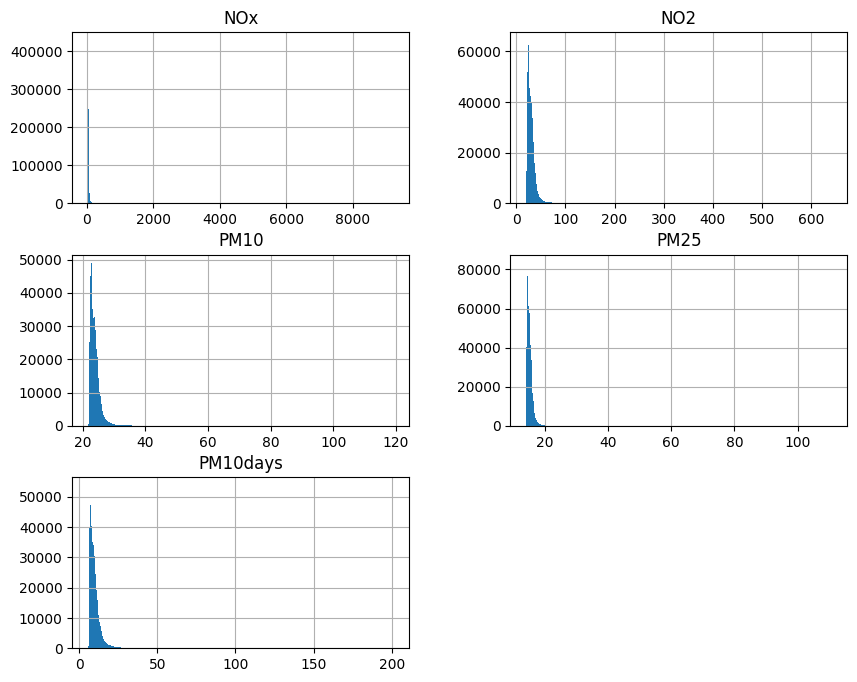

In [106]:
# Plot histograms for each column in the DataFrame
df[['NOx', 'NO2', 'PM10', 'PM25', 'PM10days']].hist(bins=5000, figsize=(10,8))

# Show the plot
plt.show()

Histograms confirm that all pollutant concentration data as well as the PM10 days have right-skewed data distribution.

Boxplots will help further to identify any outliers.

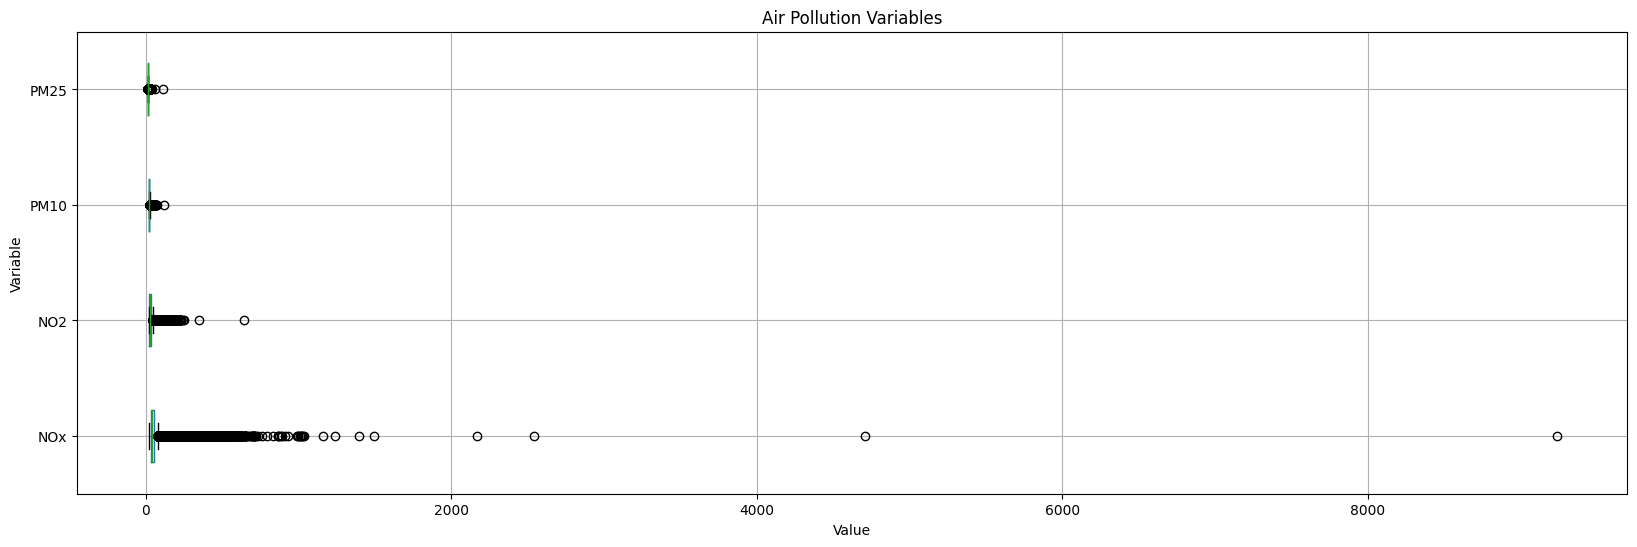

In [186]:
# Create boxplots for each pollutant concentration: NOx, NO2, PM10, PM25

# Create a list of column names to plot
cols_to_plot = ['NOx', 'NO2', 'PM10', 'PM25']

# Set the figure size
fig, ax = plt.subplots(figsize=(20,6))

# Create a boxplot for each column
df[cols_to_plot].boxplot(ax=ax, vert=False)

# Set the title and labels for the plot
ax.set_title('Air Pollution Variables')
ax.set_xlabel('Value')
ax.set_ylabel('Variable')

# Show the plot
plt.show()

The boxplots for PM25 and PM10 show one or two outliers that are not as extreme as the outliers in the boxplots for NO2 and NOx, which have long tails to the right where the outliers are more noticeable.

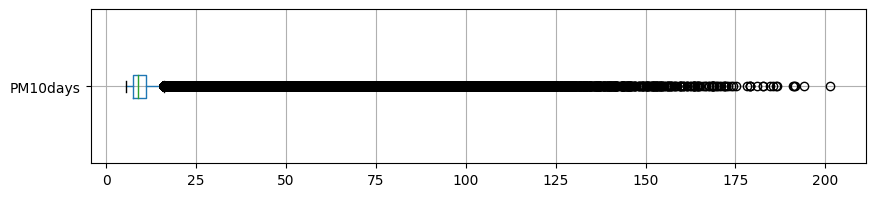

In [188]:
# create the boxplot
plt.figure(figsize=(10,2))
df.boxplot(column=['PM10days'], vert=False)
plt.xticks()
plt.show()

PM10days variable is right-skewed with outliers, and the wide range of values suggests significant variation in the hazardous levels of PM10 concentration across different areas in London. Specifically, some areas experienced high levels almost every day, while others had as few as five such days in the same year.

In the final step of our exploration we will examine the number of outliers for the pollutants and days of PM10days.

In [150]:
# Define the columns to exclude from outlier detection
exclude_cols = ['x', 'y']

# Calculate the IQR for each column except those in the exclude_cols list
Q1 = df.drop(exclude_cols, axis=1).quantile(0.25)
Q3 = df.drop(exclude_cols, axis=1).quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers (1.5 times the IQR)
threshold = 1.5 * IQR

# Detect the outliers for each column except those in the exclude_cols list
outliers = (df.drop(exclude_cols, axis=1) < (Q1 - threshold)) | (df.drop(exclude_cols, axis=1) > (Q3 + threshold))

# Create a new DataFrame containing only the rows with outliers
df_outliers = df[outliers.any(axis=1)]


df_outliers

,x,y,NOx,NO2,PM10,PM25,PM10days
156,501500,170780,82.06126,44.28459,26.12705,15.78222,14.63797
157,501500,170800,82.81725,44.56213,26.18382,15.80441,14.77987
158,501500,170820,83.37747,44.76360,26.22545,15.82117,14.88443
159,501500,170840,83.71297,44.87789,26.24860,15.83124,14.94272
160,501500,170860,83.92352,44.94346,26.26127,15.83750,14.97469
...,...,...,...,...,...,...,...
5838317,558880,187200,97.49384,47.06801,27.34560,15.70129,17.84720
5838318,558880,187220,89.83262,44.51301,26.78235,15.54624,16.32086
5838319,558880,187240,86.78239,43.48205,26.55770,15.48433,15.73283
5838320,558880,187260,82.82460,42.13244,26.26655,15.40423,14.98801


Dataset contains about 5% of outliers, as there are 347804 rows out of total 5856428 rows containing outliers for at least on of the PM10, PM25, NOx, NO2, PM10days features. 
Air pollution and air quality predictions are typically very sensitive to outliers. In these types of applications, outliers can represent extreme events or anomalies that can have a significant impact on the overall air quality and pollution levels. For example, a small number of extremely high pollutant readings could indicate a major source of pollution that needs to be addressed, or a small number of extremely low readings could indicate that the air quality in a particular area is much better than expected. Thus,  5% of outliers could be considered a lot and should not be dismissed. It would be important to carefully investigate these outliers and determine whether they represent real anomalies that need to be addressed or whether they are the result of measurement error or other factors that can be accounted for in the data preprocessing stage.

Lets look at the most extreme outlier which are bigger than 50 8 IQR

In [156]:
# Define the columns to exclude from outlier detection
exclude_cols = ['x', 'y']

# Calculate the IQR for each column except those in the exclude_cols list
Q1 = df.drop(exclude_cols, axis=1).quantile(0.25)
Q3 = df.drop(exclude_cols, axis=1).quantile(0.75)
IQR = Q3 - Q1

# Define the threshold for outliers (1.5 times the IQR)
threshold = 55 * IQR

# Detect the outliers for each column except those in the exclude_cols list
outliers = (df.drop(exclude_cols, axis=1) < (Q1 - threshold)) | (df.drop(exclude_cols, axis=1) > (Q3 + threshold))

# Create a new DataFrame containing only the rows with outliers
df_extreme_outl = df[outliers.any(axis=1)]


df_extreme_outl


,x,y,NOx,NO2,PM10,PM25,PM10days
201314,505200,175260,2541.881,212.1641,49.18314,40.61438,128.82890
203102,505220,175260,1394.476,138.4154,37.39938,28.83687,59.05515
557034,508740,175340,2171.128,188.7077,45.14111,36.63027,105.05530
557086,508740,176380,9237.618,643.0457,119.39940,110.82710,201.40770
559231,508760,175340,1241.624,128.8865,35.70564,27.19364,50.24131
559283,508760,176380,4706.768,351.6342,72.18203,63.60859,194.14360
561482,508780,176380,1495.701,145.1047,38.71870,30.14410,66.36320
2771796,527900,180980,1161.780,253.8885,63.63592,28.82191,182.76220


We will look at the summary statistics for the extreme outliers and compare with the summary statistics for the entire dataset.

In [173]:
# provide summary statistics for the extreme outliers
df_extreme_outl.describe()

,x,y,NOx,NO2,PM10,PM25,PM10days
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,510262.500000,176415.000000,2993.872000,257.730850,57.670665,45.834607,123.482170
std,7304.459988,1920.647212,2778.208529,172.238354,28.127752,28.844266,62.934576
min,505200.000000,175260.000000,1161.780000,128.886500,35.705640,27.193640,50.241310
25%,507860.000000,175320.000000,1356.263000,143.432375,38.388870,28.833130,64.536188
50%,508750.000000,175860.000000,1833.414500,200.435900,47.162125,33.387185,116.942100
75%,508765.000000,176380.000000,3083.102750,278.324925,65.772447,46.362932,185.607550
max,527900.000000,180980.000000,9237.618000,643.045700,119.399400,110.827100,201.407700


In [189]:
#print again the summary statistics for entire data frame 

# set the display format for floating-point numbers in the 'summary' DataFrame
pd.set_option('display.float_format', lambda x: '%.4f' % x)
summary.head(15)

,NOx,NO2,PM10,PM25,PM10days
count,5856428.0000,5856428.0000,5856428.0000,5856428.0000,5856428.0000
mean,47.8491,30.7069,23.9652,15.2761,10.1099
std,24.8397,8.9401,1.8297,0.8772,5.3223
min,23.3495,19.0982,21.6277,14.0314,5.4822
10%,30.2173,23.0146,22.4171,14.4346,6.8151
25%,34.1613,24.9787,22.8073,14.6571,7.5135
50%,42.5074,28.8825,23.5807,15.0989,8.9786
75%,53.0482,33.6373,24.5580,15.6445,10.9931
90%,67.1691,39.3231,25.7461,16.2879,13.7042
99.4%,185.6658,76.9023,33.2590,18.9866,38.8001


In [190]:
# Revert to the default display format for floating-point numbers after printing the 
pd.reset_option('display.float_format')

In [192]:
# show records with the most extreme values for NOx
df.loc[[557086, 559283]]


,x,y,NOx,NO2,PM10,PM25,PM10days
557086,508740,176380,9237.618,643.0457,119.39940,110.82710,201.4077
559283,508760,176380,4706.768,351.6342,72.18203,63.60859,194.1436


**Conclusion**   

NOx has two most extreme outliers and when comparing with its median of 42.5, the max value of 9237.681 is 217 times higher than the median, whereas the NO2 max concentration of 643.0457 for the same location is 22 times higher than its median of 28.9. Also the other pollutants for the same location are much less higher than the median (PM2.5 is 7 times higher and PM10 is 5 times higher).


Thus, records containing these two extreme values will be removed.

**Removing 2 outliers**

In [254]:
# Remove the two records containing NOx concentration anomalies
df.drop([557086, 559283], inplace=True)

### **Examining correlations among features**

Although it is generally not necessary to check for correlations between variables before applying k-means clustering (since k-means clustering is a distance-based method that relies on the Euclidean distance between data points to form clusters), the correlations between variables will be still checked.The reason being for checking correlation is that we suspect that the pollutant variables to be  correlated as they may come from the same sources, have similar chemical properties, or  are affected by similar environmental conditions . 
Also, highly correlated variables can result in redundant information and can bias the clustering results, making it difficult to interpret the clusters. 

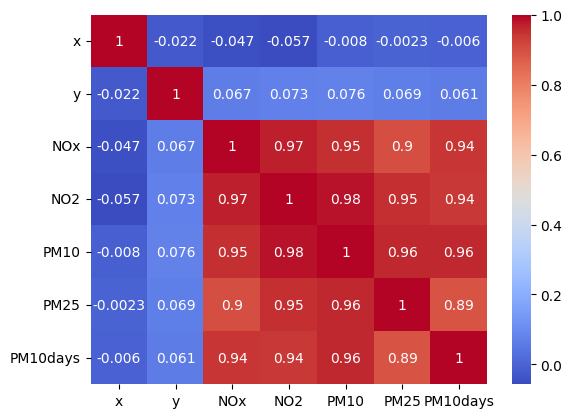

In [187]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

It appears that there is a strong  correlation  between NOx, NO2, PM10, PM10d, and PM25 indicating a strong positive linear relationship between these variables.
z

This multicollinearity makes sense in the context of air pollution data, as all pollutants are related to sources of air pollution, such as transportation emissions.

It may be necessary to use feature selection or dimensionality reduction techniques to remove redundant variables before applying k-means clustering.


### **Deciding on scaling and/or transformation methods**


After creating the histograms, we visually inspected the shape of the distribution for each column and there were mixed results. 
PM10 and PM2.5 are slightly skewed, whereas NOx and NO2 were very right-skewed with extreme outliers.

Outliers can significantly impact the performance of K-means ans we need to consider removing or transforming them.


Scaling rules:

- If a column has a roughly **symmetric** distribution, then **StandardScaler** may be a good choice for scaling. 
- If a column has a **skewed** distribution, then M**inMaxScaler** may be a better choice. 
- If a column contains **outliers**, then you may use  **RobustScaler**, which is less sensitive to outliers.



<h1 style="background-color: rgba(200, 200, 220, 0.3);">Further Data Exploration with K-means<h1/>


Atmospheric pollutant concentrations data will be further explored with K-Means clustering, which is 
K-M commonly used unsupervised machine learning algorithm that can group data points into distinct clusters based on their similarities. 


The purpose of using K-Means clustering on air pollutant concentration data would be to identify distinct groups or clusters of pollutants that may have similar concentrations or patterns of occurrence. This information can be used to inform air quality management and policy decisions, such as identifying areas with high concentrations of certain pollutants and developing targeted interventions to reduce emissions.

**Normalizing the data**


K-means is a distance-based clustering algorithm and is sensitive to the scale of the data. Normalizing the  data will ensure that features with larger values do not dominate the clustering.

- If a column has a roughly symmetric distribution, then StandardScaler may be a good choice for scaling.
- If a column has a skewed distribution, then MinMaxScaler may be a better choice.
- If a column contains outliers, then you may use RobustScaler, which is less sensitive to outliers.

In [255]:
# Select the columns to scale
cols_to_scale = ['NOx', 'NO2', 'PM10', 'PM25', 'PM10days']

We will use Robust scaling as it is less sensitive to outliers that we have in pollutant concentration values.

In [256]:
# Create a RobustScaler object
scaler = RobustScaler()

In [257]:
# Fit and transform the the selected columns (perform normalization)
df_scaled = scaler.fit_transform(df[cols_to_scale])

In [258]:
# Convert the normalized data back to a pandas DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=cols_to_scale)

# Show the normalized data
df_scaled.head()

,NOx,NO2,PM10,PM25,PM10days
0,0.3553,0.2814,0.0933,-0.1989,0.0930
1,0.3854,0.3086,0.1175,-0.1822,0.1174
2,0.4162,0.3362,0.1422,-0.1652,0.1424
3,0.4468,0.3637,0.1667,-0.1483,0.1672
4,0.4768,0.3904,0.1907,-0.1316,0.1918


**Adding x, y columns to the df_scaled**

In [259]:
df_scaled[['x','y']] = df[['x','y']] 

In [260]:
# verify changes
df_scaled.head()

,NOx,NO2,PM10,PM25,PM10days,x,y
0,0.3553,0.2814,0.0933,-0.1989,0.0930,501460.0000,170580.0000
1,0.3854,0.3086,0.1175,-0.1822,0.1174,501460.0000,170600.0000
2,0.4162,0.3362,0.1422,-0.1652,0.1424,501460.0000,170620.0000
3,0.4468,0.3637,0.1667,-0.1483,0.1672,501460.0000,170640.0000
4,0.4768,0.3904,0.1907,-0.1316,0.1918,501460.0000,170660.0000


**Selecting features** 

From the perspective of harmfulness of the dataset pollutants for human health, we could rank them as follows:

 - PM2.5 can penetrate deeply into the lungs and bloodstream, causing respiratory and cardiovascular diseases, lung cancer, and premature death.
  -  PM10 can also cause respiratory and cardiovascular diseases, although its larger size makes it less harmful than PM2.5.
  - NO2 (nitrogen dioxide)  can irritate the lungs and cause respiratory problems, especially in people with asthma and other preexisting conditions.
 - NOx (nitrogen oxides) - NOx can contribute to the formation of smog and acid rain, and can also cause respiratory problems.


Hence, we will select the following features:
 - **PM2.5** 
 - **PM10** 
 - **NO2** 

**Creating dataset for  training**

In [261]:
# select 3 variables to train the model on
df_train = df_scaled[['NO2', 'PM10', 'PM25']]

In [262]:
df_train.head()

,NO2,PM10,PM25
0,0.2814,0.0933,-0.1989
1,0.3086,0.1175,-0.1822
2,0.3362,0.1422,-0.1652
3,0.3637,0.1667,-0.1483
4,0.3904,0.1907,-0.1316


**Determine the optimal number of clusters**

 K-means requires you to specify the number of clusters upfront. Use techniques like the elbow method or silhouette analysis to determine the optimal number of clusters for your data.

In [263]:
# Define a range of values for k (the number of clusters) that you want to test
k_values = range(1, 11)

In [264]:
# Create a list to store the within-cluster sum of squares (WCSS) for each value of k
wcss = []

In [198]:
# Iterate through the range of k values and fit a k-means clustering model to the data for
# each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/ana

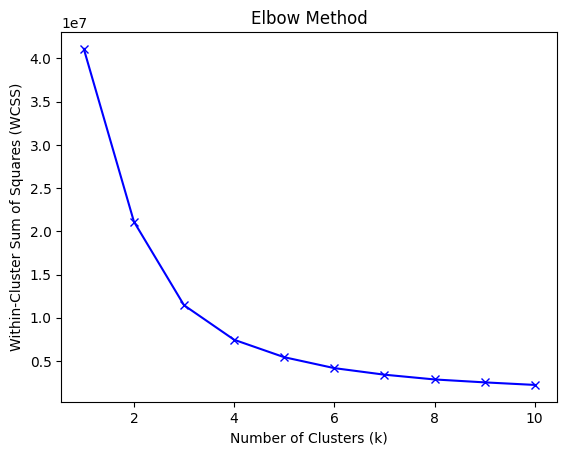

In [199]:
# Plot the WCSS for each value of k
plt.plot(k_values, wcss, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

After examining the plot we identify the "elbow" point at k=4, which is the point of diminishing returns in terms of the reduction in WCSS as the number of clusters increases. The optimal number of clusters is typically the value of k at the elbow point.

In [265]:
# create an instance of the KMeans class and set the number of clusters
kmeans = KMeans(n_clusters=4)

**Training K-means model**

In [266]:
# fit the k-means model to your scaled data using the fit() method
kmeans.fit(df_train)

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

**Getting Cluster labels**

In [267]:
# Once the k-means model is trained, we can obtain the cluster labels for each data point using the predict() method
cluster_labels = kmeans.predict(df_train)

In [268]:
# Print cluster labels
cluster_labels

array([0, 0, 0, ..., 3, 3, 3], dtype=int32)

** Adding new cluster labels to the df_scaled dataset**

In [269]:
# add cluster labels to the df_scaled dataset
df_scaled['cluster'] = cluster_labels

In [272]:
#verify changes
df_scaled.cluster.unique()

array([0, 3, 2, 1], dtype=int32)

**Getting  centroids**

In k-means clustering, the algorithm tries to group similar data points into k clusters based on their distances to the centroids (also known as cluster centers). We can plot the centroids and the data points in a scatter plot to visualize the clusters and how they are distributed in the feature space.

In [273]:
# get the centroids using the cluster_centers_ attribute:
centroids = kmeans.cluster_centers_

In [274]:
# Print  centroids
centroids

array([[ 0.43784277,  0.44151471,  0.44003148],
       [ 5.70600709,  5.80113693,  4.1127587 ],
       [ 1.75861572,  1.79156986,  1.64768334],
       [-0.44197013, -0.43646811, -0.4386542 ]])

The ```cluster_centers_```  attribute returned above array of shape (n_clusters, n_features) that contains the coordinates of the centroids for each cluster.

**Examining  the clusters on 3D plots**    
(based on training k-means with  NO2', 'PM10', 'PM25)

To understand the clusters, we will generate several 3D scatter plots  of three air pollutants (NO2, PM10, and PM25) with each data point color-coded based on its cluster assignment. It assumes that the data for training is stored in a Pandas DataFrame df_train, which has the following columns: 'NO2', 'PM10', 'PM25', and 'cluster'.

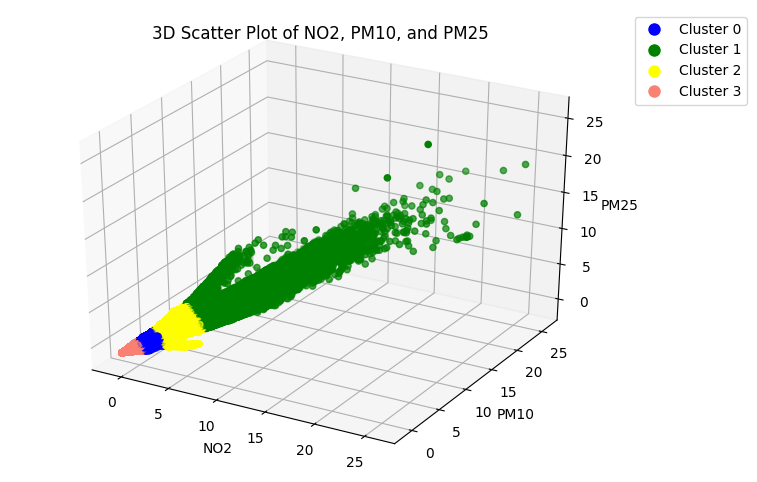

In [276]:
# Extract the input variables used for training  which are 'NOx', 'PM10', and 'PM25'
X = df_scaled[['NO2', 'PM10', 'PM25']].values # the input  variables will be stored  in a NumPy array X

# Extract the 'cluster' column of df_train
cluster_labels = df_scaled['cluster'].values # values are stored  in a NumPy array cluster_labels

# Define the colors for each cluster
colors = ['blue', 'green', 'yellow', 'salmon']

# Create a list of colors for each data point based on its cluster assignment 
# by using a list comprehension that maps each cluster label to its corresponding color
point_colors = [colors[label] for label in cluster_labels]

# Create a new figure object and add a 3D subplot to it
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the data as a 3D scatter plot using the scatter method of the subplot object ax,
# with the first column of X representing the x-axis, the 2nd col representing the y-axis, and 3rd col representing  z-axis.
# The c parameter specifies the color of each data point based on the point_colors list.
ax.scatter(X[:,0], X[:,1], X[:,2], c=point_colors)

# Set the axis labels
ax.set_xlabel('NO2')
ax.set_ylabel('PM10')
ax.set_zlabel('PM25')

# Set the title of the plot
ax.set_title('3D Scatter Plot of NO2, PM10, and PM25')

# Create a custom legend for the clusters
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
                   markerfacecolor=colors[i], markersize=10) for i in range(len(colors))]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='best', bbox_to_anchor=(1.2, 1))


# Show the plot
plt.show()


The above 3D plot shows that the clusters arrangement seems to resemble heat map grouping pollutants with smallest concentration values were assigned to one cluster, then with a bit higher values to second cluster etc.


 - 1. Green cluster with characteristics of: PM10 having values higher than 10, PM2.5 having higher values and NO2 having higher values
 - 2. Pink cluster: PM10, PM2.5 lower mid values, NO2 lower values
 - 3. Yellow cluster min val for PM10. PM2.5,  NO2 lower values
 - 4. Blue

In [ ]:
import matplotlib.colors as mcolors

light_pink = mcolors.to_rgba('#E698AF', alpha=0.5)
light_blue_green = mcolors.to_rgba('#AEDFDB', alpha=0.5)
light_peach = mcolors.to_rgba('#FCE4D6', alpha=0.5)
light_lavender = mcolors.to_rgba('#E3D3F6', alpha=0.5)




(0.7450980392156863, 0.5647058823529412, 0.36470588235294116, 0.5)
(0.6901960784313725, 0.8313725490196079, 0.6823529411764706, 0.5)
(0.8274509803921568, 0.6901960784313725, 0.5254901960784314, 0.5)
(0.6, 0.5764705882352941, 0.5568627450980392, 0.5)


In [303]:
# Plot the concentration of one pollutant against grid XY Coordinates
# Extract the variables you want to use for graph
X = df_scaled[['x', 'y', 'NO2']].values

# Extract the cluster assignments
cluster_labels = df_scaled['cluster'].values


# convert the colors to a list of tuples of RGBA values
light_brown = mcolors.to_rgba('#BE905D', alpha=0.5)
light_green = mcolors.to_rgba('#B0D4AE', alpha=0.2)
light_tan = mcolors.to_rgba('#D3B086', alpha=0.5)
light_gray = mcolors.to_rgba('#99938E', alpha=0.5)

light_pink = mcolors.to_rgba('#E698AF', alpha=0.5)
light_blue_green = mcolors.to_rgba('#AEDFDB', alpha=0.1)
light_peach = mcolors.to_rgba('#FCE4D6', alpha=0.5)
light_lavender = mcolors.to_rgba('#E3D3F6', alpha=0.1)

# create color list

colors = [light_brown, light_green,light_lavender, light_gray]
# Extract the cluster assignments
cluster_labels = df_scaled['cluster'].values


# Create a new figure object and add a 3D subplot to it
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the data as a 3D scatter plot using the scatter method of the subplot object ax,
# with the first column of X representing the x-axis, the 2nd col representing the y-axis, and 3rd col representing  z-axis.
# The c parameter specifies the color of each data point based on the point_colors list.
ax.scatter(X[:,0], X[:,1], X[:,2], c=point_colors)

# Set the axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('NO2')

# Set the title of the plot
ax.set_title('NO2 Concentration Map: 20m Grid XY Coordinates Plotted Against NO2 Concentrations')

# Create a custom legend for the clusters
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
                   markerfacecolor=colors[i], markersize=10) for i in range(len(colors))]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='best', bbox_to_anchor=(1.2, 0.8))


# Show the plot
plt.show()

ValueError: 'c' argument has 5775064 elements, which is inconsistent with 'x' and 'y' with size 5856424.

In [304]:
# Extract the variables you want to use for graph
X = df_scaled[['x', 'y', 'NO2']].values

# Extract the cluster assignments
cluster_labels = df_scaled['cluster'].values


# convert the colors to a list of tuples of RGBA values
light_brown = mcolors.to_rgba('#BE905D', alpha=0.5)
light_green = mcolors.to_rgba('#B0D4AE', alpha=0.2)
light_tan = mcolors.to_rgba('#D3B086', alpha=0.5)
light_gray = mcolors.to_rgba('#99938E', alpha=0.5)

light_pink = mcolors.to_rgba('#E698AF', alpha=0.5)
light_blue_green = mcolors.to_rgba('#AEDFDB', alpha=0.5)
light_peach = mcolors.to_rgba('#FCE4D6', alpha=0.5)
light_lavender = mcolors.to_rgba('#E3D3F6', alpha=0.1)

# create color list

colors = [light_brown, light_green,light_lavender, light_gray]

# Create a list of colors for each data point based on its cluster assignment 
# by using a list comprehension that maps each cluster label to its corresponding color
point_colors = [colors[label] for label in cluster_labels]

# Create a new figure object and add a 3D subplot to it
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the data as a 3D scatter plot using the scatter method of the subplot object ax,
# with the first column of X representing the x-axis, the 2nd col representing the y-axis, and 3rd col representing  z-axis.
# The c parameter specifies the color of each data point based on the point_colors list.
ax.scatter(X[:,0], X[:,1], X[:,2], c=point_colors)

# Set the axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('NO2')

# Set the title of the plot
ax.set_title('NO2 Concentration Map: 20m Grid XY Coordinates Plotted Against NO2 Concentrations')

# Create a custom legend for the clusters
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
                   markerfacecolor=colors[i], markersize=10) for i in range(len(colors))]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='best', bbox_to_anchor=(1.2, 0.8))


# Show the plot
plt.show()


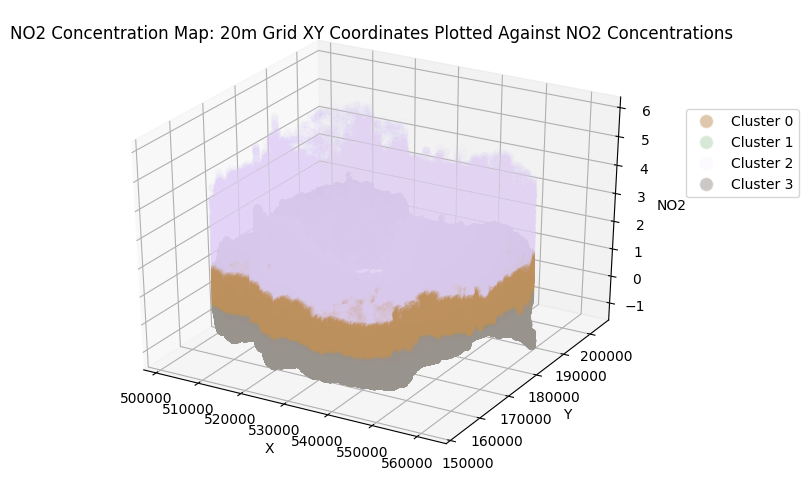

In [301]:
df_scaled_clust_3_0_2 = df_scaled[df_scaled['cluster']!=1]
# Extract the variables you want to use for graph
X = df_scaled_clust_3_0_2[['x', 'y', 'NO2']].values

# Extract the cluster assignments
cluster_labels = df_scaled_clust_3_0_2['cluster'].values


# convert the colors to a list of tuples of RGBA values
light_brown = mcolors.to_rgba('#BE905D', alpha=0.5)
light_green = mcolors.to_rgba('#B0D4AE', alpha=0.2)
light_tan = mcolors.to_rgba('#D3B086', alpha=0.5)
light_gray = mcolors.to_rgba('#99938E', alpha=0.5)

light_pink = mcolors.to_rgba('#E698AF', alpha=0.5)
light_blue_green = mcolors.to_rgba('#AEDFDB', alpha=0.5)
light_peach = mcolors.to_rgba('#FCE4D6', alpha=0.5)
light_lavender = mcolors.to_rgba('#E3D3F6', alpha=0.1)

# create color list

colors = [light_brown, light_green,light_lavender, light_gray]

# Create a list of colors for each data point based on its cluster assignment 
# by using a list comprehension that maps each cluster label to its corresponding color
point_colors = [colors[label] for label in cluster_labels]

# Create a new figure object and add a 3D subplot to it
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the data as a 3D scatter plot using the scatter method of the subplot object ax,
# with the first column of X representing the x-axis, the 2nd col representing the y-axis, and 3rd col representing  z-axis.
# The c parameter specifies the color of each data point based on the point_colors list.
ax.scatter(X[:,0], X[:,1], X[:,2], c=point_colors)

# Set the axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('NO2')

# Set the title of the plot
ax.set_title('NO2 Concentration Map: 20m Grid XY Coordinates Plotted Against NO2 Concentrations')

# Create a custom legend for the clusters
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
                   markerfacecolor=colors[i], markersize=10) for i in range(len(colors))]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='best', bbox_to_anchor=(1.2, 0.8))


# Show the plot
plt.show()


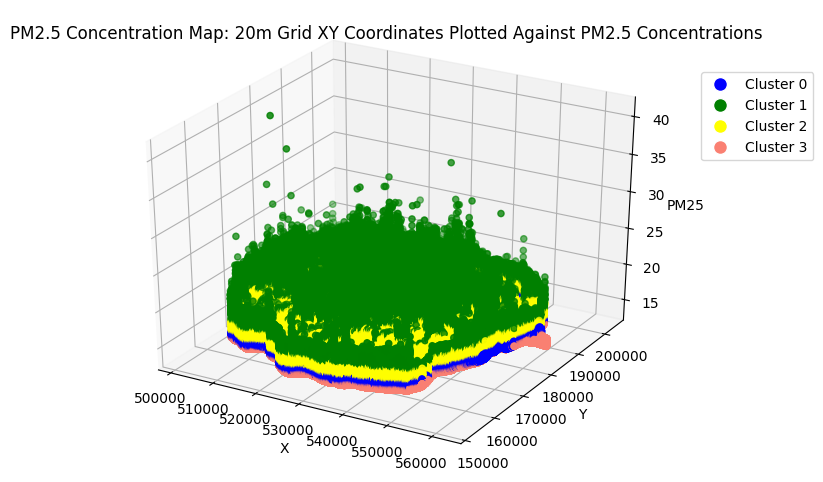

In [238]:
# Plot the concentration of one pollutant against grid XY Coordinates
# Extract the variables you want to use for graph
X = df_scaled[['x', 'y', 'PM25']].values

# Extract the cluster assignments
cluster_labels = df_scaled['cluster'].values


# Define the colors for each cluster
colors = ['blue', 'green', 'yellow', 'salmon']

# Create a list of colors for each data point based on its cluster assignment 
# by using a list comprehension that maps each cluster label to its corresponding color
point_colors = [colors[label] for label in cluster_labels]

# Create a new figure object and add a 3D subplot to it
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the data as a 3D scatter plot using the scatter method of the subplot object ax,
# with the first column of X representing the x-axis, the 2nd col representing the y-axis, and 3rd col representing  z-axis.
# The c parameter specifies the color of each data point based on the point_colors list.
ax.scatter(X[:,0], X[:,1], X[:,2], c=point_colors)

# Set the axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PM25')

# Set the title of the plot
ax.set_title('PM2.5 Concentration Map: 20m Grid XY Coordinates Plotted Against PM2.5 Concentrations')

# Create a custom legend for the clusters
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
                   markerfacecolor=colors[i], markersize=10) for i in range(len(colors))]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='best', bbox_to_anchor=(1.2, 0.88))


# Show the plot
plt.show()

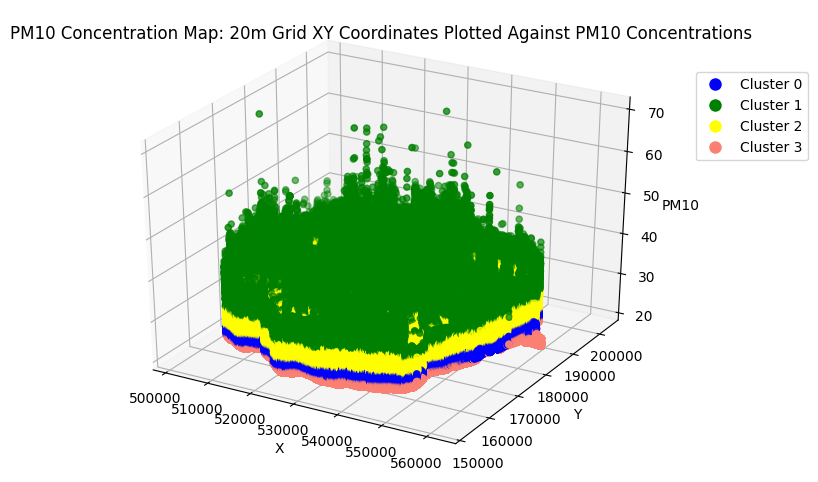

In [239]:
# Plot the concentration of one pollutant against grid XY Coordinates
# Extract the variables you want to use for graph
X = df_scaled[['x', 'y', 'PM10']].values

# Extract the cluster assignments
cluster_labels = df_scaled['cluster'].values


# Define the colors for each cluster
colors = ['blue', 'green', 'yellow', 'salmon']

# Create a list of colors for each data point based on its cluster assignment 
# by using a list comprehension that maps each cluster label to its corresponding color
point_colors = [colors[label] for label in cluster_labels]

# Create a new figure object and add a 3D subplot to it
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the data as a 3D scatter plot using the scatter method of the subplot object ax,
# with the first column of X representing the x-axis, the 2nd col representing the y-axis, and 3rd col representing  z-axis.
# The c parameter specifies the color of each data point based on the point_colors list.
ax.scatter(X[:,0], X[:,1], X[:,2], c=point_colors)

# Set the axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PM10')

# Set the title of the plot
ax.set_title('PM10 Concentration Map: 20m Grid XY Coordinates Plotted Against PM10 Concentrations')

# Create a custom legend for the clusters
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i), 
                   markerfacecolor=colors[i], markersize=10) for i in range(len(colors))]

# Add the legend to the plot
ax.legend(handles=legend_elements, loc='best', bbox_to_anchor=(1.2, 0.88))


# Show the plot
plt.show()

**Comapring summary statistics by cluster to the main data frame summary statistics**

**Entire Training Dataset Summary Statistics**

In [277]:
# Main data frame summary statistics
# set the display format for floating-point numbers in the 'summary' DataFrame
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# generate summary statistics
df_scaled[['NO2', 'PM10', 'PM25']].describe()

,NO2,PM10,PM25
count,5856426.0000,5856426.0000,5856426.0000
mean,0.2107,0.2196,0.1794
std,1.0320,1.0448,0.8872
min,-1.1300,-1.1155,-1.0811
25%,-0.4509,-0.4417,-0.4475
50%,-0.0000,0.0000,0.0000
75%,0.5491,0.5583,0.5525
max,25.9867,26.1600,25.8414


**Cluster 3 summary  statistics**

In [279]:
# set the display format for floating-point numbers in the 'summary' DataFrame
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# generate summary statistics
df_scaled[df_scaled['cluster'] == 3][['NO2', 'PM10', 'PM25']].describe()

,NO2,PM10,PM25
count,2920410.0000,2920410.0000,2920410.0000
mean,-0.4417,-0.4362,-0.4384
std,0.2476,0.2372,0.2431
min,-1.1300,-1.1155,-1.0811
25%,-0.6358,-0.6277,-0.6334
50%,-0.4518,-0.4427,-0.4484
75%,-0.2452,-0.2412,-0.2442
max,0.9669,0.2436,0.1582


**Cluster 0 summary  statistics**

In [280]:
# set the display format for floating-point numbers in the 'summary' DataFrame
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# generate summary statistics
df_scaled[df_scaled['cluster'] == 0][['NO2', 'PM10', 'PM25']].describe()

,NO2,PM10,PM25
count,2243800.0000,2243800.0000,2243800.0000
mean,0.4385,0.4422,0.4407
std,0.3126,0.3028,0.3070
min,-0.1656,-0.5353,-0.4336
25%,0.1818,0.1862,0.1970
50%,0.3979,0.3972,0.3933
75%,0.6534,0.6710,0.6661
max,2.6397,2.8903,1.4068


**Cluster 2 summary  statistics**

In [281]:
# set the display format for floating-point numbers in the 'summary' DataFrame
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# generate summary statistics
df_scaled[df_scaled['cluster'] == 2][['NO2', 'PM10', 'PM25']].describe()

,NO2,PM10,PM25
count,610854.0000,610854.0000,610854.0000
mean,1.7606,1.7935,1.6492
std,0.6851,0.6473,0.5654
min,0.1412,0.1760,0.0568
25%,1.2349,1.2964,1.2673
50%,1.5466,1.5776,1.5107
75%,2.1135,2.1331,1.9349
max,5.8547,7.3829,4.7015


**Cluster 1 summary  statistics**

In [282]:
# set the display format for floating-point numbers in the 'summary' DataFrame
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# generate summary statistics
df_scaled[df_scaled['cluster'] == 1][['NO2', 'PM10', 'PM25']].describe()


,NO2,PM10,PM25
count,81362.0000,81362.0000,81362.0000
mean,5.7094,5.8048,4.1150
std,1.8050,2.0695,1.5001
min,0.7644,2.1693,0.4129
25%,4.3919,4.3206,3.1362
50%,5.2577,5.2056,3.7274
75%,6.5557,6.6804,4.6461
max,25.9867,26.1600,25.8414


Based on the graphs and summary statistics, we can see that the distribution of each variable in each cluster is different.

Cluster 0 has the largest number of data points (2243800), and the mean values for NO2, PM10, and PM25 are relatively low (0.4385, 0.4422, and 0.4407, respectively). The standard deviations are also relatively low (0.3126, 0.3028, and 0.3070), indicating that the data points are more condensed and less dispersed than in the other clusters.

Cluster 1 has the smallest number of data points (81362), and the mean values for NO2, PM10, and PM25 are significantly higher than in the other clusters (5.7094, 5.8048, and 4.1150, respectively). The standard deviations are also relatively high (1.8050, 2.0695, and 1.5001), indicating that the data points are more spread out.

Cluster 2 has a moderate number of data points (610854), and the mean values for NO2, PM10, and PM25 are higher than in Cluster 0 but lower than in Cluster 1 (1.7606, 1.7935, and 1.6492, respectively). The standard deviations are also moderate (0.6851, 0.6473, and 0.5654), indicating that the data points are somewhat condensed but not as much as in Cluster 0.

Cluster 3 has the same summary statistics as Cluster 0. This could be an indication that the clustering algorithm has identified a significant portion of the data as belonging to a "default" cluster that does not exhibit distinct characteristics.

Overall, we can see that there is a clear difference in the data distribution between the four clusters. Clusters 0 and 3 are similar, with lower mean values and more condensed data points, while Clusters 1 and 2 have higher mean values and more spread-out data points. The order of the clusters based on their concentrations appears to be 3, 0, 2, and 1, which is consistent with the scatter plot visualization.



**Evaluate the results**

 Finally, evaluate the quality of the clustering results using metrics like the within-cluster sum of squares (WCSS) or silhouette score.

In [33]:
# Calculate the WCSS for the clustering results:
wcss = kmeans.inertia_

In [233]:
# Calculate the silhouette score for the clustering results:
silhouette_avg = silhouette_score(df_train, cluster_labels)
print('WCSS:', wcss)
print('Silhouette Score:', silhouette_avg)

"""The WCSS is a measure of how compact the clusters are, and lower values
indicate better clustering results. The silhouette score is a measure of
how well-separated the clusters are, and higher values indicate better
clustering results. However, these metrics should be used in conjunction 
with visual inspection of the clustering results to ensure that the clusters
make sense and are meaningful for the specific problem you are trying to solve."""

KeyboardInterrupt: 